# Introducción a la estadística Bayesiana con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Teorema de Bayes" title="Teorema de Bayes" src="https://relopezbriega.github.io/images/bayes.jpg" >

## Introducción: La estadística y el conocimiento científico

La [estadística](https://relopezbriega.github.io/category/pobabilidad-y-estadistica.html) es la ciencia que relaciona los datos con las preguntas que nos interesa responder. Esto incluye elaborar métodos para recopilar los datos pertinentes a cada pregunta, métodos para resumir y mostrar los datos de forma tal que arrojen luz sobre las preguntas a responder; y los métodos que nos permitan dibujar las respuestas a cada pregunta y que sean apoyadas por los datos. Cuando trabajamos con datos, debemos tener en cuenta que casi siempre contienen *incertidumbre*. Esta *incertidumbre* puede surgir de la selección de los elementos que tomamos para nuestras mediciones, o puede surgir de la variabilidad misma del proceso de medición. En cierto sentido, podemos decir que obtener conclusiones generales de los datos es la base para aumentar el conocimiento que tenemos sobre el mundo,y es la base de toda investigación científica. 

### El método científico y la estadística

El [método científico](https://es.wikipedia.org/wiki/M%C3%A9todo_cient%C3%ADfico) busca relaciones de causa y efecto entre una *variable experimental* y una *variable de resultado*. Es decir, cómo cambiando el valor de la *variable experimental* resulta en un cambio en la *variable de resultado*. En muchas oportunidades este proceso puede ser tan simple o complejo como desarrollar modelos matemáticos para estas relaciones; pero siempre es necesario aislar al experimento de factores externos que podrían afectar los resultados experimentales. Estos factores externos deben ser controlados de forma tal que el verdadero efecto de la *variable experimental* en la *variable de resultado* pueda ser determinado con cierto grado de seguridad. En ciencias como biología, medicina, ingeniería, tecnología y ciencias sociales no es tan fácil identificar estos factores relevantes que deben ser controlados. En esos campos se necesita una forma diferente de controlar a los  factores externos; es aquí dónde la ***inferencia estadística*** se vuelve una herramienta fundamental para apoyar a la investigación científica.

Los métodos estadísticos de *inferencia* pueden utilizarse cuando hay una *variabilidad aleatoria* en los datos. Esto puede extender el método científico a situaciones en las que los factores externos relevantes no pueden ser identificados. Como no podemos identificar estos factores externos, no podemos controlarlos directamente. La falta de control directo significa que los factores externos afectarán los datos, por lo que existirá el peligro de que podamos extraer conclusiones erróneas del experimento debido a estos factores externos que no se pueden controlar. La [estadística](https://relopezbriega.github.io/category/pobabilidad-y-estadistica.html) nos ofrece la importante idea de la *asignación aleatoria o al azar* para hacer frente a esta posibilidad. Los factores externos no identificados pueden ser *promediados* asignando *aleatoriamente* cada unidad a un grupo de tratamiento, o a un grupo de control. La *asignación aleatoria* nos permite controlar estadísticamente los factores externos por medio de *promediar* sus efectos; aunque esto no evitará que las conclusiones estadísticas tengan un cierto grado de  incertidumbre o error debido a esta variabilidad. La *asignación aleatoria* no sólo nos ayuda a reducir la incertidumbre debido a los factores externos, sino que también nos permite medir la cantidad de incertidumbre que permanece en las conclusiones del experimento apoyados por un modelo de [probabilidad](https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/). 


### La inferencia Bayesiana

Dentro de este contexto, podemos encontrar a la *[inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana)*, la cual se caracteriza justamente por tratar a los elementos desconocidos en forma *aleatoria*; y nos permite ir adaptando el modelo a medida que nos vamos encontrando con nueva evidencia. Es decir, que vamos a comenzar con una *[distribución](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) previa* de los datos, la cual puede ser elegida al azar o en base a nuestra experiencia; y luego vamos a ir adaptando el modelo a medida que vamos agregando nueva evidencia hasta alcanzar una *[distribución](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) posterior*. Esta  *[distribución](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) posterior* será la que mejor se adapte a la información con que contábamos al principio, mas la nueva evidencia que hemos adquirido y va a representar el grado de credibilidad que le asignamos a nuestra hipótesis. La importancia de la *[inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana)* la vamos a encontrar sobre todo cuando no contamos con una gran cantidad de información para comprobar nuestro modelo; nos va a permitir expresar la incertidumbre sobre el resultado de lo que estamos modelando. Pero para entender en mayor profundidad a la *[inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana)* comencemos por el principio.

## El Teorema de Bayes

[Thomas Bayes](https://es.wikipedia.org/wiki/Thomas_Bayes) fue un ministro presbiteriano y matemático inglés que estudió la relación íntima que existe entre la [probabilidad](https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/), la predicción y el progreso científico. Su trabajo se centró principalmente en cómo formulamos nuestras creencias probabilísticas sobre el mundo que nos rodea cuando nos encontramos con nuevos datos o evidencias. El argumento de [Bayes](https://es.wikipedia.org/wiki/Thomas_Bayes) no es que el mundo es intrínsecamente probabilístico o incierto, ya que él era un creyente en la divina perfección; sino que aprendemos sobre el mundo a través de la aproximación, acercándonos cada vez más a la verdad a medida que recogemos más evidencias. Este argumento lo expresó matemáticamente a través de su famoso [teorema](https://es.wikipedia.org/wiki/Teorema_de_Bayes):


$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}
$$


En donde:

* $P(H)$ es el **[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)**, la forma de introducir conocimiento previo sobre los valores que puede tomar la hipótesis. A veces cuando no sabemos demasiado se suelen usar *a prioris* que asignan igual probabilidad a todos los valores de la hipótesis; otras veces se puede elegir *a prioris* que restrinjan los valores a rangos razonables, por ejemplo solo valores positivos; y otras veces contamos con información mucho más precisa, como experimentos previos o límites impuesto por alguna teoría.


* $P(D|H)$ es el **likelihood**, la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. A medida que la cantidad de datos aumenta, el *likelihood* tiene cada vez más peso en los resultados. Debemos tener en cuenta que si bien el *likelihood* se asemeja a una *probabilidad*, en realidad no lo es; el *likelihood* de una hipótesis $H$, dados los datos $D$ va a ser proporcional a la *probabilidad* de obtener $D$ dado que $H$ es verdadera. Dado que el *likelihood* no es una *probabilidad* tampoco tiene que respetar las leyes de las probabilidades y por lo tanto no necesariamente tiene que sumar 1.


* $P(H|D)$ es el **[a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori)**, la [distribución de probabilidad](https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/) final para la hipótesis. Es la consecuencia lógica de haber usado un conjunto de datos, un *likelihood* y un *a priori*. Se lo suele pensar como la versión actualizada del *a priori* luego de que hemos agregado los datos adicionales.


* $P(D)$ es el **likelihood marginal** o **evidencia**, la probabilidad de observar los datos $D$ promediado sobre todas las posibles hipótesis $H$. En general, la *evidencia* puede ser vista como una simple constante de normalización que en la mayoría de los problemas prácticos puede omitirse sin demasiada perdida de generalidad. 

Si los fundamentos filosóficos del [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) son sorprendentemente ricos, sus matemáticas son increíblemente simples. En su forma más básica, no es más que una expresión algebraica con tres variables conocidas y una incógnita; y que trabaja con [probabilidades condicionales](https://es.wikipedia.org/wiki/Probabilidad_condicionada), nos dice la probabilidad de que una hipótesis $H$ sea verdadera si algún evento $D$ ha sucedido. El [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) es útil porque lo que normalmente sabemos es la [probabilidad](https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) de los efectos dados las causas, pero lo que queremos saber es la [probabilidad](https://relopezbriega.github.io/blog/2016/11/26/introduccion-a-la-teoria-de-probabilidad-con-python/) de las causas dadas los efectos. Por ejemplo, sabemos qué porcentaje de pacientes con gripe tiene fiebre, pero lo que realmente queremos saber es la probabilidad de que un paciente con fiebre tenga gripe. El [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) nos permite ir de uno a otro con suma facilidad.

Para que quede más claro, ilustremos el [teorema](https://es.wikipedia.org/wiki/Teorema_de_Bayes) con un simple ejemplo del diagnostico médico, una de las aplicaciones dónde más éxito ha tenido la [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana). Supongamos que nos hicimos un estudio y nos ha dado positivo para una rara enfermedad que solo el 0.3 % de la población tiene; la tasa de efectividad de este estudio es del 99 %, es decir, que solo da [falsos positivos](https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II) en el 1 % de los casos. ¿Cuán probable es que realmente tengamos la enfermedad?. En un principio, nos veríamos tentados a responder que hay un 99 % de probabilidad de que tengamos la enfermedad; pero en este caso nos estaríamos olvidando del concepto importante del *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)*, sabemos con anterioridad que la enfermedad es extremadamente rara (solo el 0.3 % la tiene), si incluimos esta información previa a nuestro cálculo de probabilidad y aplicamos el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) podemos llegar a una conclusión totalmente distinta.

$$ P(\text{ rara enfermedad | positivo}) = \frac{P(\text{ positivo | rara enfermedad})P( \text{rara enfermedad})}{P(\text{positivo})}$$


In [1]:
# Ejemplo simple teorema de Bayes aplicado a estimación de un sólo parámetro.
a_priori = 0.003
likelihood = 0.99
evidencia = 0.01

a_posteriori = likelihood * a_priori / evidencia
a_posteriori

0.297

Como vemos, luego de aplicar el [teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) llegamos a la conclusión de que en realidad nuestra probabilidad de estar realmente enfermo es de sólo 30 % y no de 99 %, ya que podemos ser uno de los [falsos positivos](https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II) del estudio y la enfermedad es realmente muy rara. Como este ejemplo demuestra, la inclusión del *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)* es sumamente importante para la  [inferencia bayesiana](https://es.wikipedia.org/wiki/Inferencia_bayesiana), por lo cual también debemos ser sumamente cuidadosos a la hora de elegirla. Cuando nuestra *[a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori)* es fuerte, puede ser sorprendentemente resistente frente a nuevas evidencias.

### El problema de la moneda

Los problemas de monedas son clásicos cuando hablamos de [probabilidad y estadística](https://relopezbriega.github.io/category/pobabilidad-y-estadistica.html), nos permiten ejemplificar conceptos abstractos de forma simple. Asimismo, pueden ser muchas veces conceptualmente similares a situaciones *reales*, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, puede ser pensado como si estuviéramos hablando de monedas. 


## Aplicaciones de la estadística Bayesiana



## Ventajas y desventajas del enfoque Bayesiano

## Ejemplos en Python

## Librerías de Python para estadística Bayesiana

In [2]:
# <!-- collapse=True -->
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt

np.random.seed(1984) #replicar random

%matplotlib inline

In [3]:
n_experimentos = 4
theta_real = .35  # en una situación real este valor es desconocido
datos = stats.bernoulli.rvs(theta_real, size=n_experimentos)
datos

array([0, 0, 0, 0])

In [4]:
with pm.Model() as nuestro_primer_modelo:
    # a priori
    theta = pm.Beta('theta', alpha=1, beta=1)
    # likelihood
    y = pm.Bernoulli('y', p=theta, observed=datos)
    #y = pm.Binomial('theta',n=n_experimentos, p=theta, observed=sum(datos))

In [5]:
with nuestro_primer_modelo:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta_logodds__]
100%|██████████| 1500/1500 [00:07<00:00, 199.19it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


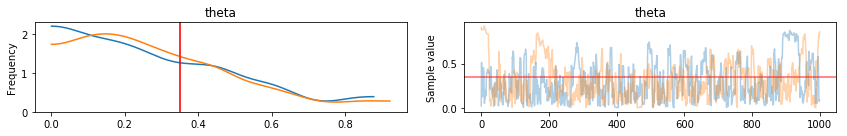

In [6]:
burnin = 0  # por ahora lo fijamos en 0, es decir nada de burnin
pm.traceplot(trace[burnin:], lines={'theta':theta_real}); 
# lines={'theta':theta_real} permite mostrar el valor de theta_real (el valor "correcto"),
# como una linea roja

In [7]:
pm.df_summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.300572,0.21551,0.015037,0.000353,0.724258,82.0,0.999569


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

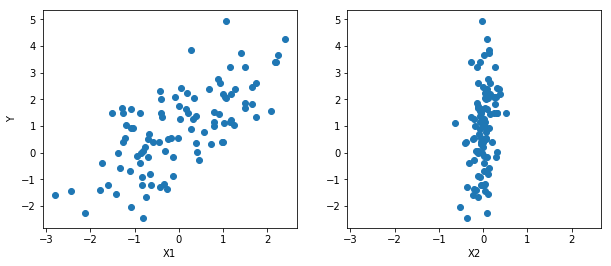

In [9]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [10]:
from pymc3 import Model, Normal, HalfNormal

basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [4]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
{'beta': array([ 0.94848602,  2.60705514]), 'sigma_log_': array(-0.032781470174030686), 'alpha': array(0.9065985497559482)}


In [5]:
from pymc3 import NUTS, sample
from scipy import optimize

with basic_model:
    # draw 500 posterior samples
    trace = sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -153.48: 100%|██████████| 200000/200000 [00:26<00:00, 7647.19it/s]
Finished [100%]: Average ELBO = -153.51
WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
100%|██████████| 500/500 [00:02<00:00, 248.43it/s]


In [6]:
trace['alpha'][-5:]

array([ 0.8648949 ,  0.959205  ,  1.0081515 ,  1.00818868,  0.79794345])

In [7]:
from pymc3 import Slice

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = Slice(vars=[sigma])

    # draw 5000 posterior samples
    trace = sample(5000, step=step, start=start)


Assigned NUTS to alpha
Assigned NUTS to beta


Optimization terminated successfully.
         Current function value: 149.019762
         Iterations: 4
         Function evaluations: 176


100%|██████████| 5000/5000 [00:12<00:00, 405.91it/s]


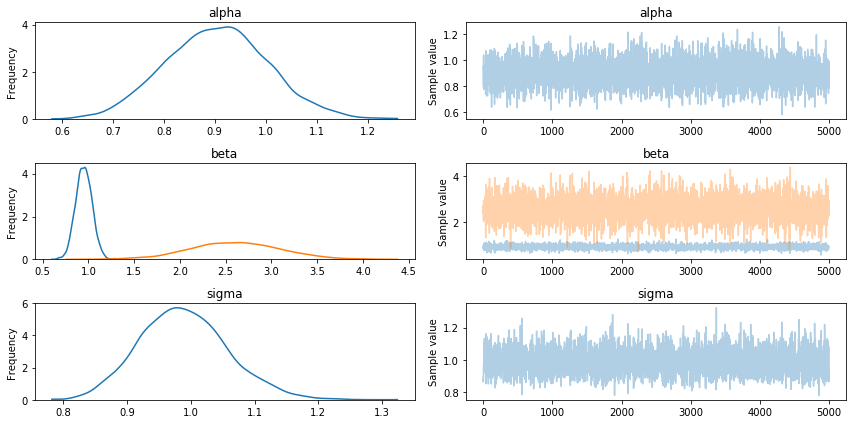

In [8]:
from pymc3 import traceplot

traceplot(trace);

In [9]:
from pymc3 import summary

summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.904            0.099            0.001            [0.707, 1.092]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.714          0.836          0.905          0.971          1.101


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.948            0.089            0.001            [0.777, 1.120]
  2.597            0.496            0.008            [1.591, 3.538]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.778          0.889          0.949          1.009          1.122
  1.616          2.264          2.599   